In this notebook, I will make simple linear regression to predict the salary. The dataset includes two columns  “Years of Experience” and “Salary” for 30 employees, therefore, I will build the model to find the relationship between the independent variable "Years of Experience" and dependent variable "Salary". 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Step 1: Load the dataset**

In [2]:
df = pd.read_csv("C://Users//Vimoney//Documents//salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Step 2: Split dataset into training set and test set**

 Separate the features we want to use to train the model from the label we want it to predict. Here, we now have numpy arrays named X containing the featurex, and y containing the labels.

In [3]:
X,y=df[["YearsExperience"]].values, df[["Salary"]].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]
 [2.9]
 [3. ]
 [3.2]
 [3.2]
 [3.7]]

Labels:
[[39343.]
 [46205.]
 [37731.]
 [43525.]
 [39891.]
 [56642.]
 [60150.]
 [54445.]
 [64445.]
 [57189.]]


In [4]:
print(type(X))

<class 'numpy.ndarray'>


We then split the data randomly (rather than say, taking the first 70% of the data for training and keeping the rest for validation).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 21 rows
Test Set: 9 rows


Now we have the following four datasets:

X_train: The feature values we'll use to train the model
y_train: The corresponding labels we'll use to train the model
X_test: The feature values we'll use to validate the model
y_test: The corresponding labels we'll use to validate the model

**Step 3: Fit Simple Linear Regression model to training set**

We create an object of the LinearRegression class and call the fit method passing the X_train and y_train.

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Step 4: Predict the test set**

Using the regressor we trained in the previous step, we will now use it to predict the results of the test set and compare the predicted values with the actual values

In [7]:
y_pred = regressor.predict(X_test)

Then we can compare these predictions to the actual label values.

In [12]:
dframe=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()}) 
dframe

,Actual,Predicted
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


**Step 5 — Visualizing the training set**

Visualizing a scatter plot that compares the predictions to the actual labels to see how the model is effective or not.

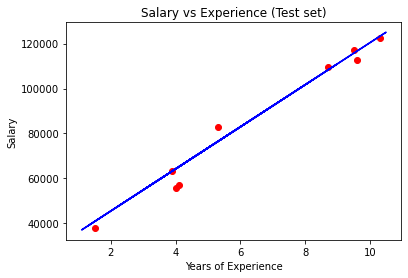

In [13]:
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line 
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Step 7 — Make new predictions**

We can make new predictions for data points that do not exist in the dataset, for example, a person with 34 years of experience. 

In [17]:
new_salary_pred = regressor.predict([[34]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [[345026.27507178]]
